<a href="https://colab.research.google.com/github/tiwarekarsanika/Health_Condition_from_Drugs/blob/main/drug_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #data pre-processing
import string
import itertools #confusion matrix
import numpy as np
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #vectorization
from sklearn.model_selection import train_test_split #splitting the training and test set
from sklearn.linear_model import PassiveAggressiveClassifier #model 1
from sklearn.naive_bayes import MultinomialNB #model 2
from sklearn import metrics #calculating accuracy

In [ ]:
df = pd.read_csv("drugsComTrain_raw.tsv", sep = "\t")
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [ ]:
pd.set_option("display.max_rows", None) #to show all rows of pandas dataframe and not just ...
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [ ]:
df_train = df[(df["condition"] == "Birth Control") | (df["condition"] == "Depression") | (df["condition"] == "High Blood Pressure") | (df["condition"] == "Insomnia")]

In [ ]:
df.shape

(161297, 7)

In [ ]:
df_train.shape

(43851, 7)

In [ ]:
X = df_train.drop(["Unnamed: 0", "drugName", "rating", "date", "usefulCount"], axis = 1)

In [ ]:
X.shape

(43851, 2)

## Exploratory Data Analysis (EDA)

In [ ]:
X.condition.value_counts()

Birth Control          28788
Depression              9069
Insomnia                3673
High Blood Pressure     2321
Name: condition, dtype: int64

In [ ]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [ ]:
X_birth = X[(X["condition"] == "Birth Control")]
X_dep = X[(X["condition"] == "Depression")]
X_ins = X[(X["condition"] == "Insomnia")]
X_hbp = X[(X["condition"] == "High Blood Pressure")]

Text(0.5, 1.0, 'Word Cloud for Birth Control')

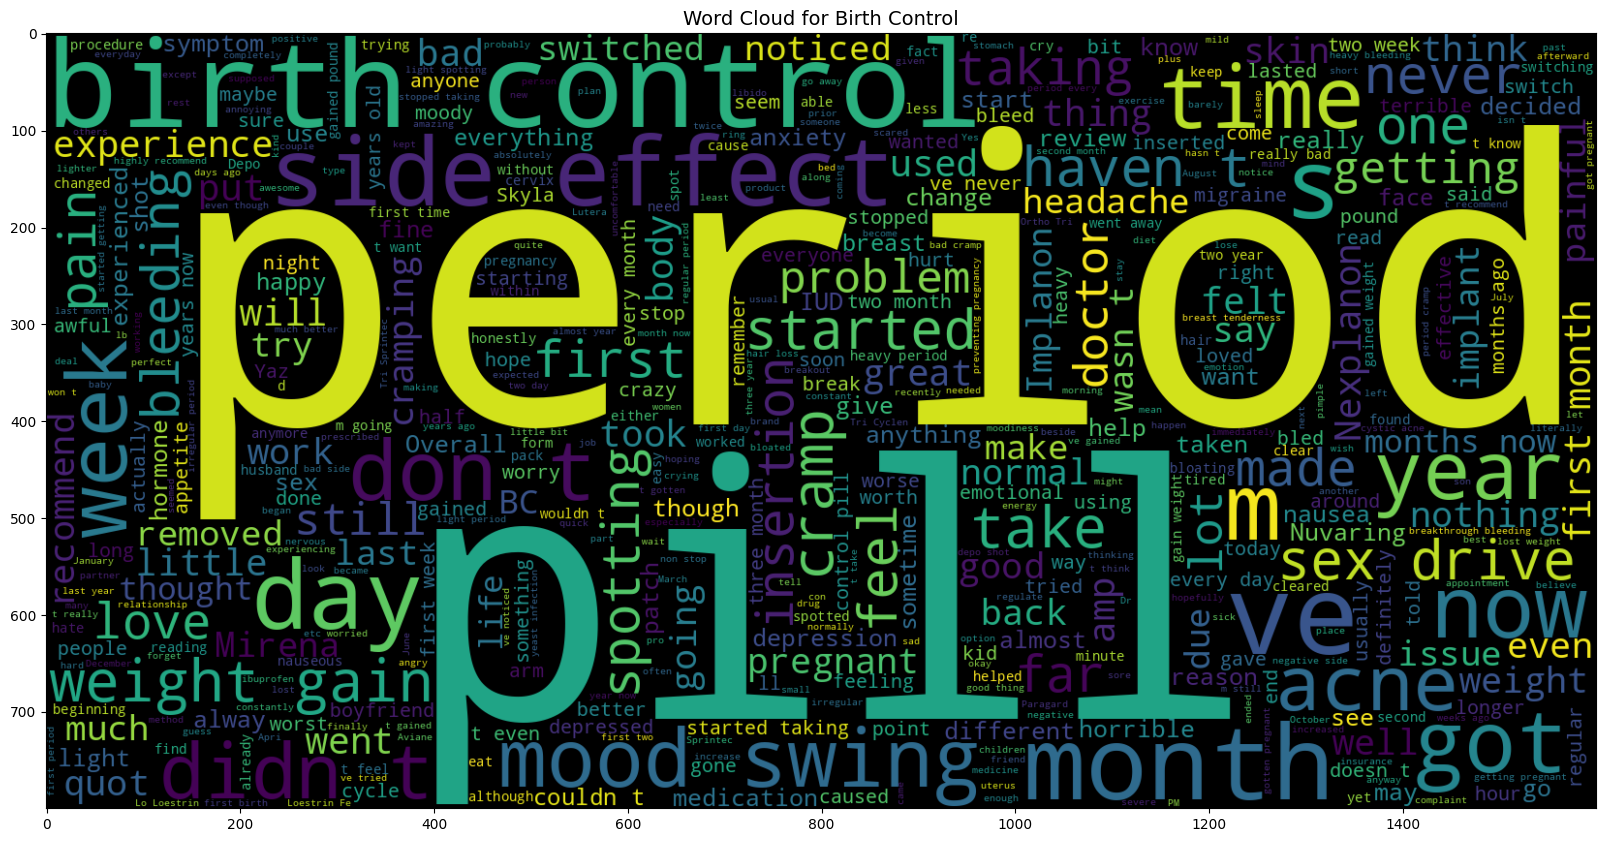

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for Birth Control", fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Depression')

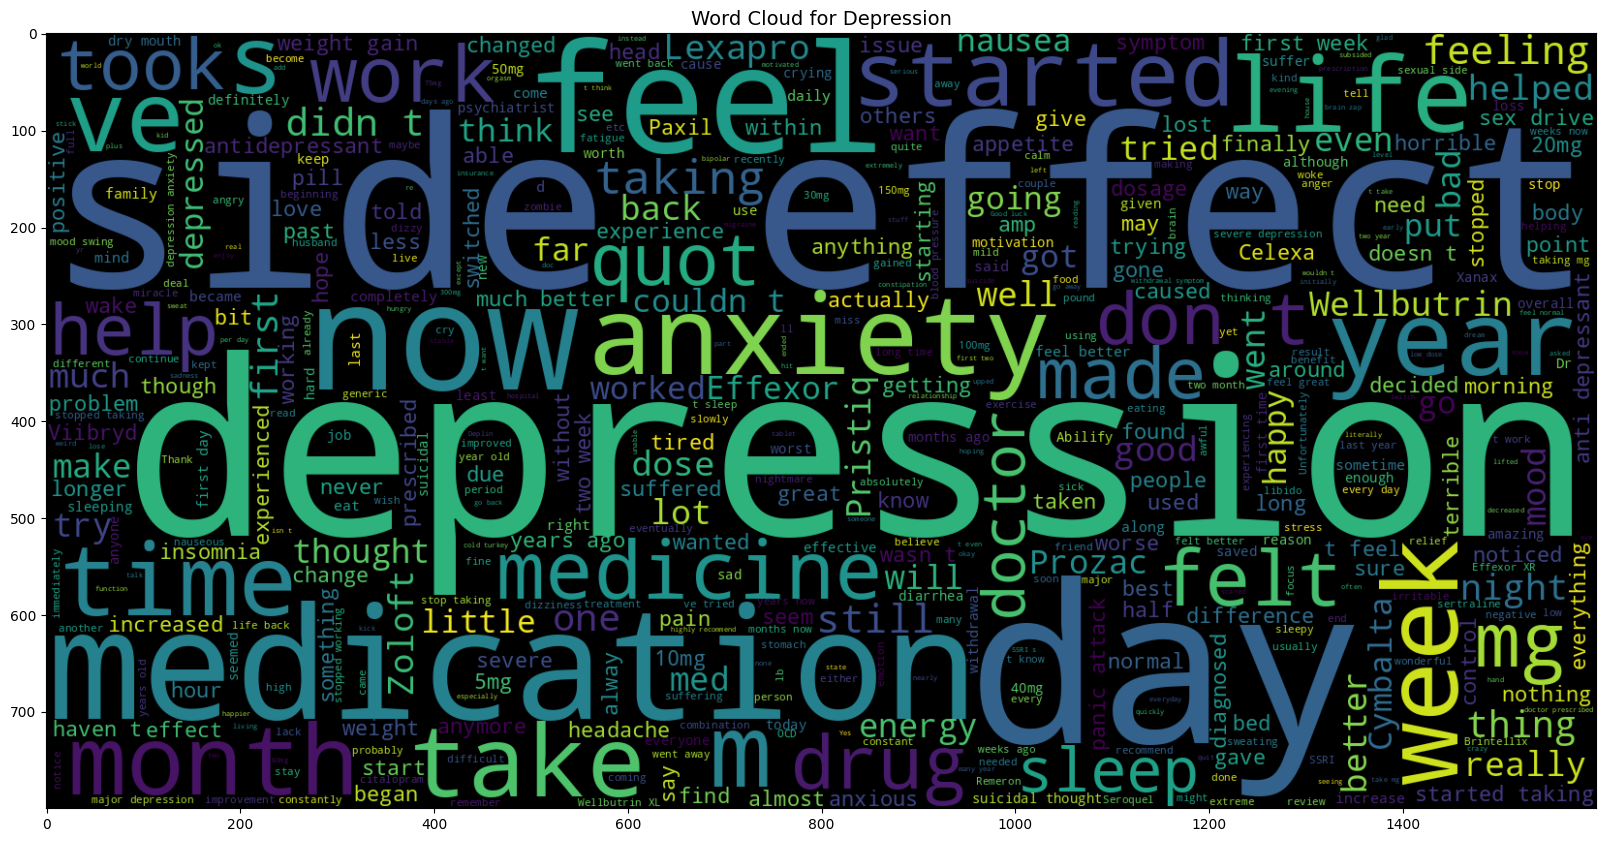

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for Depression", fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Insomnia')

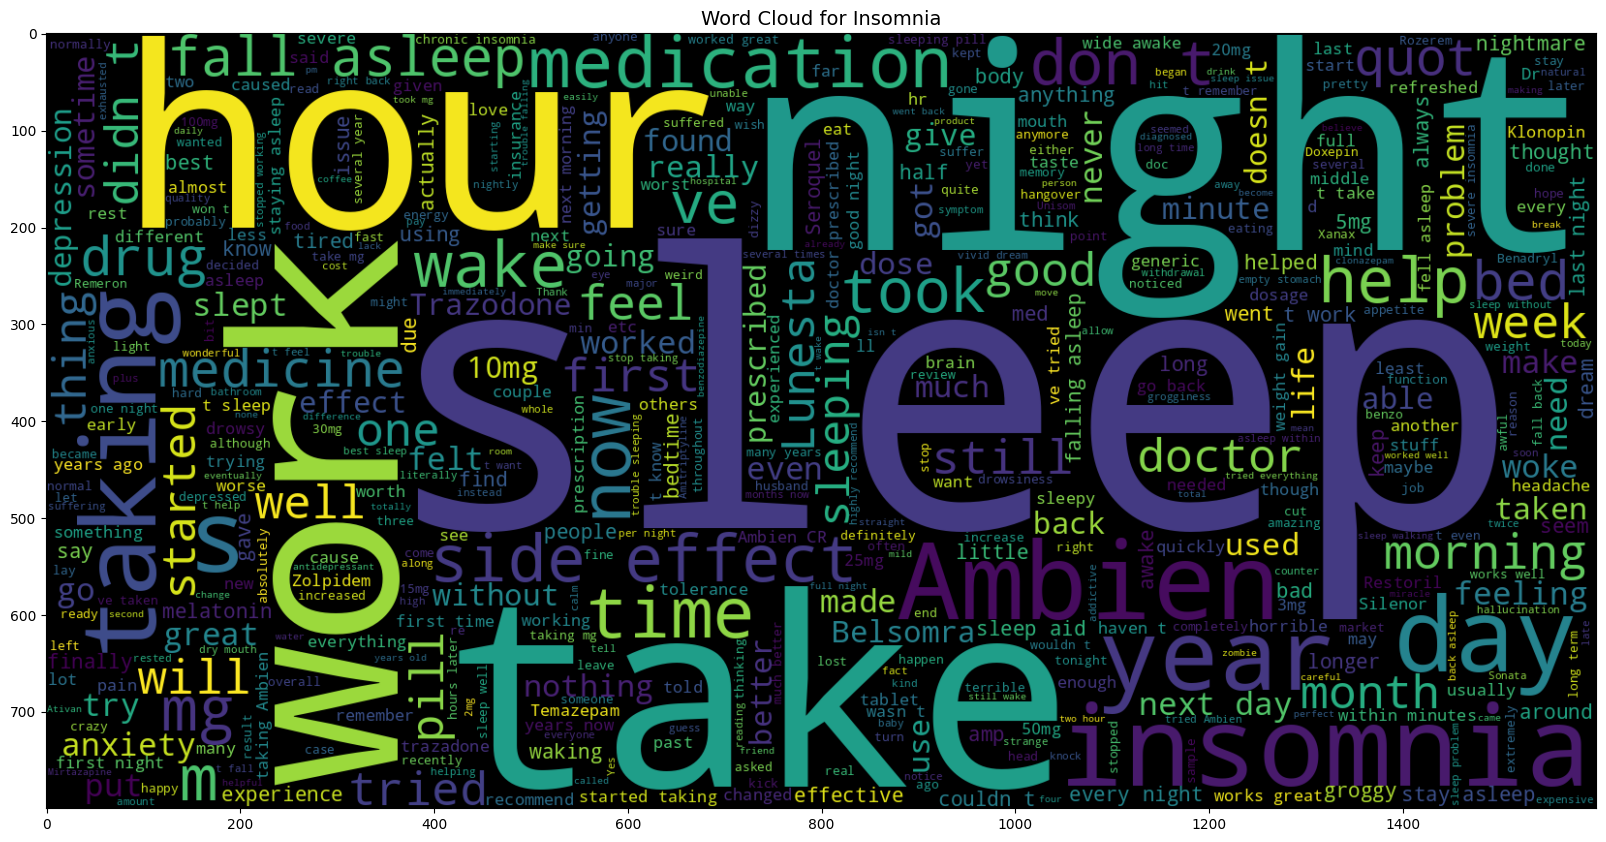

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_ins.review))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for Insomnia", fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for High Blood Pressure')

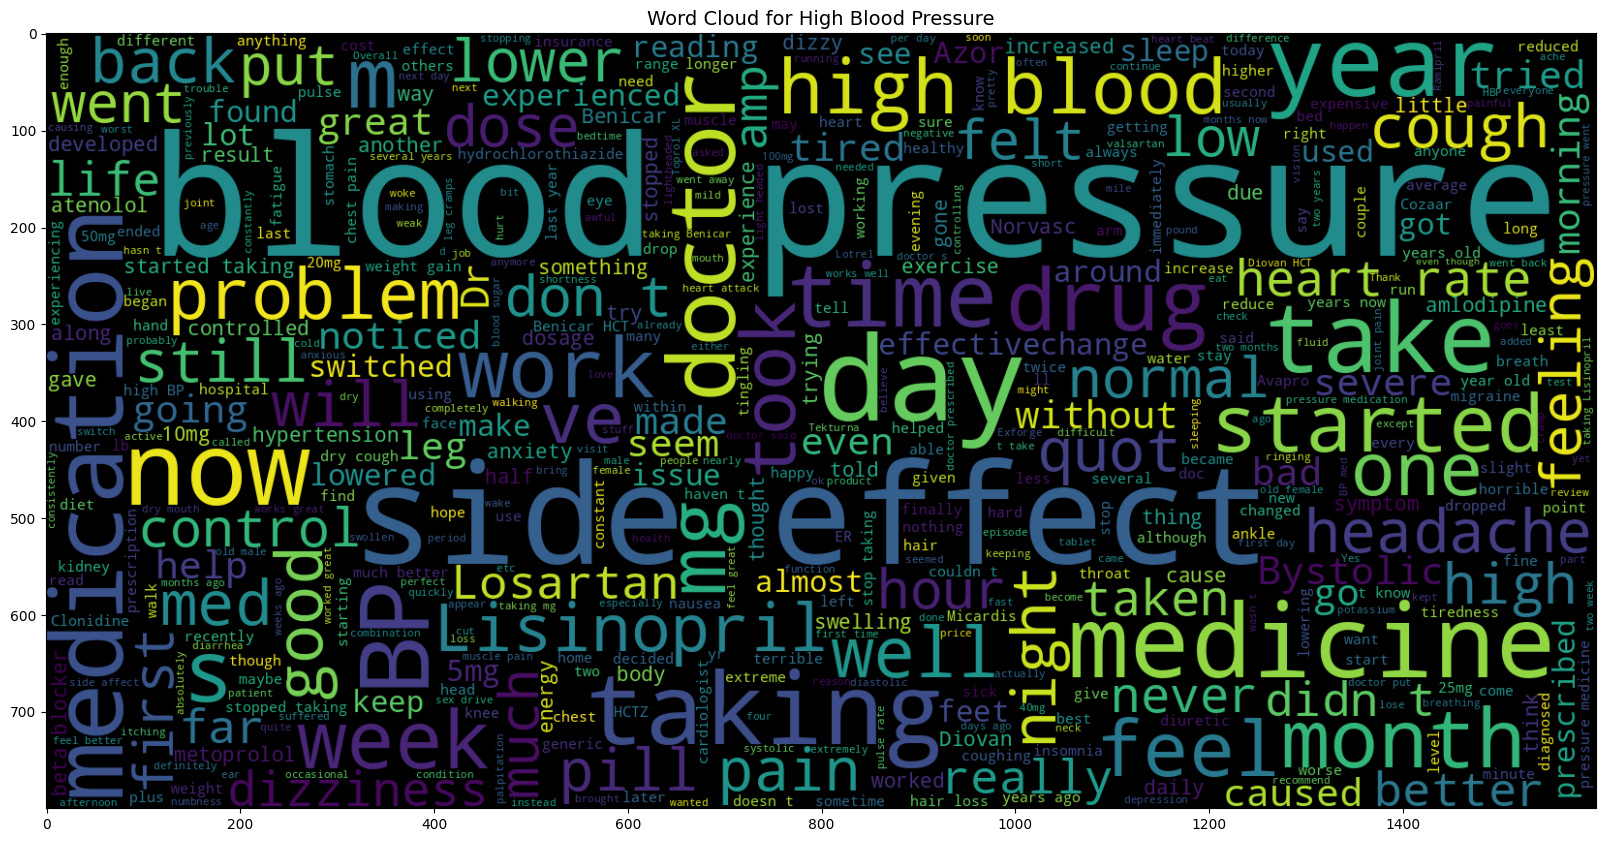

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(X_hbp.review))
plt.imshow(wc, interpolation = "bilinear")
plt.title("Word Cloud for High Blood Pressure", fontsize = 14)

# Data Preprocessing

In [ ]:
X["review"][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [ ]:
X["review"][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [ ]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [ ]:
pd.set_option('max_colwidth', -1) #set column width to maximum

<ipython-input-20-0468349ee739>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1) #set column width to maximum


In [ ]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                 
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                      
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                     
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                               

## Removing Stop Words

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Lemmitization

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(stemmer.stem("sportingly"))
print(stemmer.stem("very"))
print(stemmer.stem("troubled"))

sportingli
veri
troubl


In [ ]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


Lemmatization is more accurate than Stemming, hence proved.

## Data Cleaning

In [ ]:
from bs4 import BeautifulSoup #since all the reviews are scrapped, to remove all the html elements from texts
import re #substituting symbol to letter and letter to symbol

In [ ]:
def review_to_words(raw_review):
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text() #delete html elements
  letters_only = re.sub('[^a-zA-Z]', ' ', review_text) #getting rid of numbers and symbols
  words = letters_only.lower().split() #to maintain consistency in dictionary
  meaningful_words = [w for w in words if not w in stop] #removing stop words
  lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words] #lemmitization
  return(' '.join(lemmatized_words)) #space join words


In [ ]:
X["clean_review"] = X["review"].apply(review_to_words)

<ipython-input-29-f9f8eedff61b>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text() #delete html elements


In [ ]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                  
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                       
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                      
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                           

## Creating Features & Target Variables

In [ ]:
X_features = X["clean_review"]
Y = X["condition"]

## Splitting Dataset into Training and Testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size = 0.2, random_state = 0)

## Confusion Matrix for Multiple Classes

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Bag of Words Model

In [ ]:
count_vectorizer = CountVectorizer(stop_words = "english") #no need as such to remove stop words again
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test) #never fit the test set

#Model 1: Naive Bayes

accuracy: 0.964


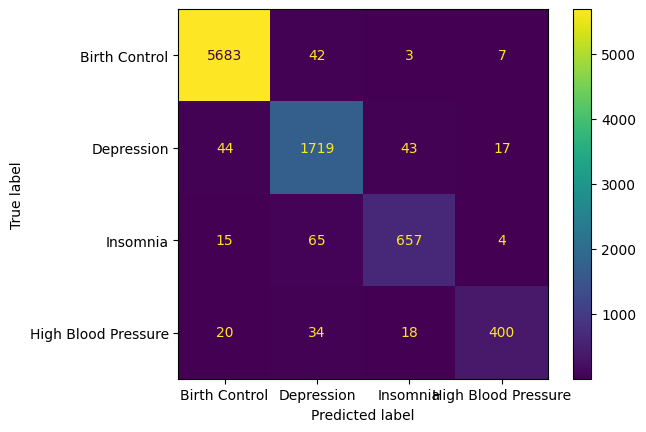

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mnb = MultinomialNB()
mnb.fit(count_train, Y_train)
pred = mnb.predict(count_test)

score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(Y_test, pred, labels = ["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp.plot()
plt.show()

#Model 2: Passive Aggressive Classifier

accuracy: 0.969


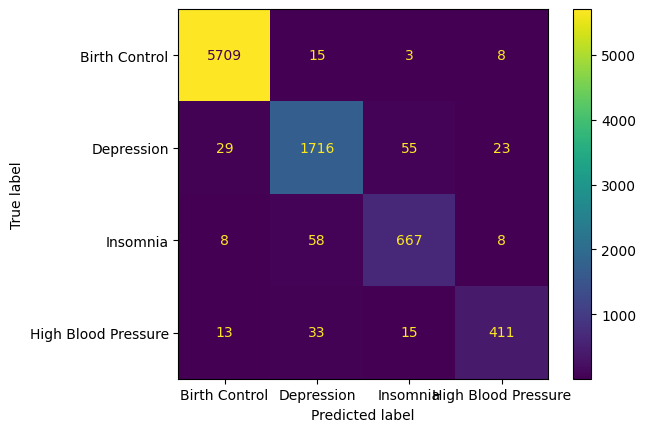

In [ ]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, Y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(Y_test, pred, labels = ["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp.plot()
plt.show()

# TFIDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df = 0.8) #maximum occurence or threshold of a word to be excluded is 80%
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## Model 1: Naive Bayes

accuracy: 0.914


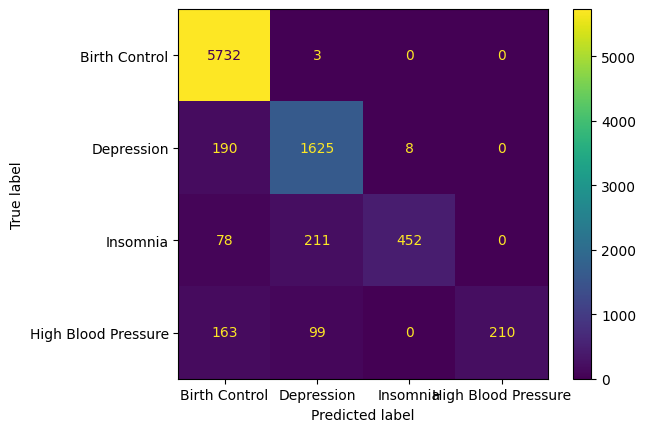

In [ ]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, Y_train)
pred = mnb_tf.predict(tfidf_test)

score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(Y_test, pred, labels = ["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp.plot()
plt.show()

## Model 2: Passive Aggressive Classfifier

accuracy: 0.973


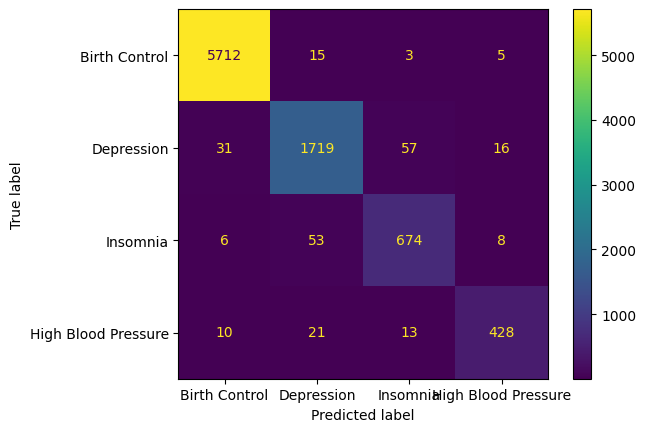

In [ ]:
passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(tfidf_train, Y_train)
pred = passive_tf.predict(tfidf_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(Y_test, pred, labels = ["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp.plot()
plt.show()

#TFIDF Bigrams

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words="english", max_df = 0.8, ngram_range=(1,2)) #analysing 2 words in a pair and their dependence on classfying a certain review in a certain condition
tfidf_train2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test2 = tfidf_vectorizer2.transform(X_test)

accuracy: 0.978


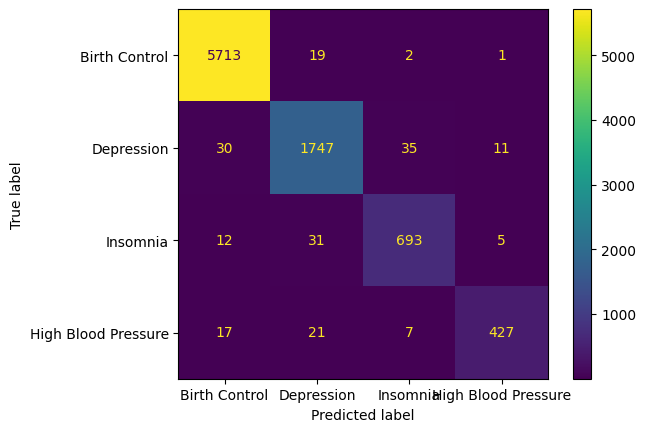

In [ ]:
passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(tfidf_train2, Y_train)
pred = passive_tf.predict(tfidf_test2)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(Y_test, pred, labels = ["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp.plot()
plt.show()

## TFIDF Trigrams

In [ ]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words="english", max_df = 0.8, ngram_range=(1,3)) #analysing 3 words in a pair and their dependence on classfying a certain review in a certain condition
tfidf_train3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test3 = tfidf_vectorizer3.transform(X_test)

accuracy: 0.978


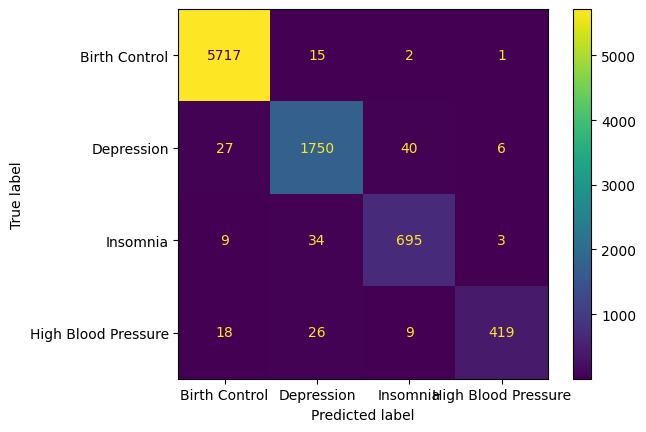

In [ ]:
passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(tfidf_train3, Y_train)
pred = passive_tf.predict(tfidf_test3)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(Y_test, pred, labels = ["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Birth Control", "Depression", "Insomnia", "High Blood Pressure"])
disp.plot()
plt.show()

# Most Important Features

In [ ]:
def most_imp_features(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)

In [ ]:
most_imp_features(tfidf_vectorizer, passive_tf, "Birth Control")

Birth Control torodal 0.5185252819219164
Birth Control torture 0.5185252819219164
Birth Control bruising 0.6705614761983071
Birth Control adfib 0.68078828780894
Birth Control zappy 0.6813137306352784
Birth Control cranker 0.7238810759157237
Birth Control abt 0.7313652836828349
Birth Control commented 0.8992390852801777
Birth Control thete 0.916377543245479
Birth Control foremost 6.953582731693196


In [ ]:
most_imp_features(tfidf_vectorizer, passive_tf, "Depression")

Depression disease 0.48026355053834274
Depression diaphram 0.48384698843592383
Depression struggling 0.4977350148938047
Depression deepened 0.5150580884555813
Depression discernible 0.5817096554399737
Depression sedadting 0.7578000649898543
Depression behave 0.8552441914766785
Depression antihistamine 0.9285527186411964
Depression asii 1.421826210458481
Depression alcoholism 4.276831911479558


In [ ]:
most_imp_features(tfidf_vectorizer, passive_tf, "Insomnia")

Insomnia definitely 0.5686803856962621
Insomnia taxpayer 0.6044166545901106
Insomnia definition 0.620381541446525
Insomnia stabilizing 0.6348685321213133
Insomnia wisdom 0.7216866437752889
Insomnia withdrawls 0.8268870013194394
Insomnia withdrawn 0.8268870013194394
Insomnia starty 1.0509584010060622
Insomnia definitelly 1.1443059729602556
Insomnia ssni 1.1751432714249204


In [ ]:
most_imp_features(tfidf_vectorizer, passive_tf, "High Blood Pressure")

High Blood Pressure false 0.5215149840099356
High Blood Pressure feast 0.541885012690008
High Blood Pressure baloon 0.6394102543344311
High Blood Pressure fluctuate 0.6505611336405199
High Blood Pressure scarring 0.7561971563931585
High Blood Pressure enegry 0.8114101567334805
High Blood Pressure endure 0.8691477100641246
High Blood Pressure fluctuated 0.873937655686258
High Blood Pressure enlightening 0.8898464906714745
High Blood Pressure flecainade 0.9049662759533117


# Sample Prediction

In [ ]:
X.tail()

condition  \
161273  Birth Control         
161277  Insomnia              
161286  Depression            
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161277  I started taking this medication 10 years ago. My doctor told me it was non-narcotic and non-habit forming.  Up to that time I had never had any addictions to drugs or alcohol, but unfortunately I am dependent on this drug for sleep.  It does however work very well with few side effects and I wake up feeling refreshed.                                                                                                                                                                                                                                                                                                 
161286  This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                                                                                                                                                                                                          
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.                                                                                                                                                                                   
161291  This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(                                                                                                                                                                                                                           

                                                                                                                          

In [ ]:
text = ["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1 = passive_tf.predict(test)[0]
print(pred1)

High Blood Pressure


In [ ]:
text = ["This is the third med I&039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
pred1 = passive_tf.predict(test)[0]
print(pred1)

Depression
